---
# General patents overview
    Analysis for the description of patents
---

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read unique count of patents
all_patents_unique = pd.read_csv("all-patents-unique.csv")
ai_unique = pd.read_csv("all-ai-unique.csv")

In [12]:
%pwd

'/Users/trinidad/Desktop/Thesis/MA-Thesis/Google Patents/Scripts'

In [3]:
## get columns in the way I need then
all_patents_unique['publication_date'] = pd.to_datetime(all_patents_unique['publication_date'], format='%Y%m%d')
all_patents_unique['term_count'] = pd.to_numeric(all_patents_unique['unique_family_count'])
all_patents_unique['publication_year'] = all_patents_unique['publication_date'].dt.year

ai_unique['publication_date'] = pd.to_datetime(ai_unique['publication_date'], format='%Y%m%d')
ai_unique['term_count'] = pd.to_numeric(ai_unique['unique_family_count'])
ai_unique['publication_year'] = ai_unique['publication_date'].dt.year

In [4]:
# Group by 'publication_year' and calculate the sum of 'term_count' for each year
grouped_all = all_patents_unique.groupby('publication_year')['term_count'].sum().reset_index()
grouped_ai = ai_unique.groupby('publication_year')['term_count'].sum().reset_index()

In [5]:
## nice printing
all_unique_total = all_patents_unique['term_count'].sum()
ai_unique_total = ai_unique['term_count'].sum()
print(f'The total term count is: {all_unique_total}')
print(f'The total term count is: {ai_unique_total}')

The total term count is: 141024111
The total term count is: 313885


In [6]:
# Calculate the proportion of AI patents
merged_df = pd.merge(grouped_all, grouped_ai, on='publication_year', suffixes=('_total', '_ai'))
merged_df['proportion'] = merged_df['term_count_ai'] / merged_df['term_count_total']
merged_df['proportion%'] = merged_df['proportion'] * 100

In [54]:
merged_df
#merged_df.to_excel('patents-all-ai.xlsx', index=False)

,publication_year,term_count_total,term_count_ai,proportion,proportion%
0,1956,181142,1,5.520531e-06,0.000552
1,1970,475762,1,2.101891e-06,0.000210
2,1976,1001070,1,9.989311e-07,0.000100
3,1978,1009414,1,9.906738e-07,0.000099
4,1979,1018543,1,9.817946e-07,0.000098
5,1981,1059925,1,9.434630e-07,0.000094
6,1982,1155776,1,8.652196e-07,0.000087
7,1983,1179042,6,5.088877e-06,0.000509
8,1984,1168247,5,4.279917e-06,0.000428
9,1985,1282034,3,2.340032e-06,0.000234


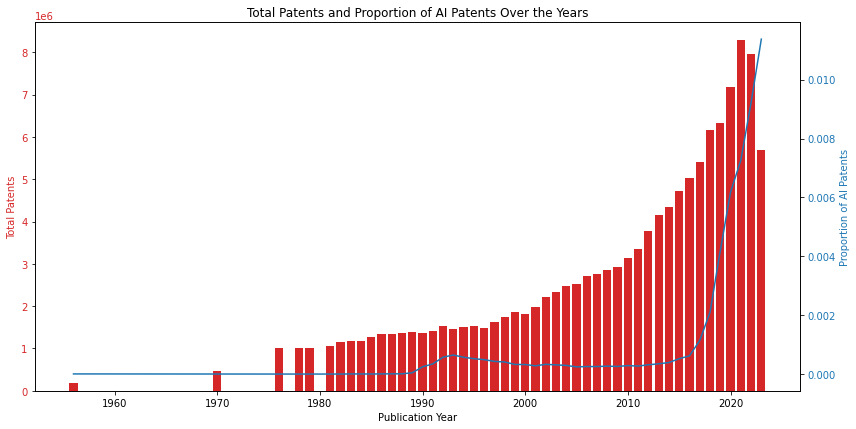

In [8]:
# Plot the simple count and proportion in a bar plot
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Publication Year')
ax1.set_ylabel('Total Patents', color=color)
ax1.bar(merged_df['publication_year'], merged_df['term_count_total'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Proportion of AI Patents', color=color)
ax2.plot(merged_df['publication_year'], merged_df['proportion'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # ensure the two axes are not too close together
plt.title('Total Patents and Proportion of AI Patents Over the Years')
plt.show()

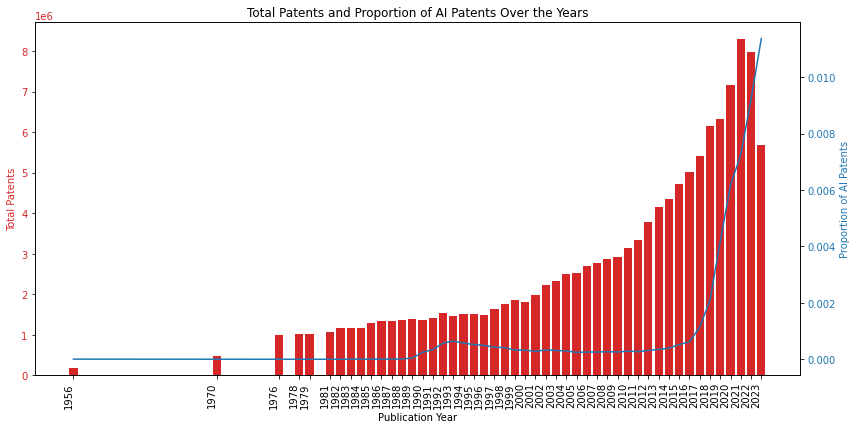

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_df is your DataFrame
# Make sure to replace this name with your actual DataFrame

# Plot the simple count and proportion in a bar plot
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Publication Year')
ax1.set_ylabel('Total Patents', color=color)
ax1.bar(merged_df['publication_year'], merged_df['term_count_total'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Proportion of AI Patents', color=color)
ax2.plot(merged_df['publication_year'], merged_df['proportion'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Set x-axis ticks to all unique years
ax1.set_xticks(merged_df['publication_year'])
ax1.set_xticklabels(merged_df['publication_year'], rotation=90, ha='right')

fig.tight_layout()  # ensure the two axes are not too close together
plt.title('Total Patents and Proportion of AI Patents Over the Years')
plt.show()


In [44]:
7968800-8292521

-323721

In [10]:
%pwd

'/Users/trinidadbosch/Desktop/SEDS/Tesis/Code/master-thesis/tesis/patents-bigquery-analysis'

In [11]:
%cd ..

/Users/trinidadbosch/Desktop/SEDS/Tesis/Code/master-thesis/tesis


In [12]:
%ls

__pycache__/               include/
bin/                       lib/
data/                      patents-bigquery-analysis/
etc/                       pyvenv.cfg
expansion-query/           requirements.txt


In [13]:
%cd data

/Users/trinidadbosch/Desktop/SEDS/Tesis/Code/master-thesis/tesis/data


In [13]:
patents = pd.read_pickle("/Users/trinidad/Desktop/Thesis/MA-Thesis/Google Patents/ai_total_.pkl")

In [15]:
patents.columns
##publication_date should be earlier than grant_date

Index(['publication_number', 'family_id', 'title_localized',
       'abstract_localized', 'publication_date', 'country_code', 'filing_date',
       'grant_date'],
      dtype='object')

In [17]:
## remove duplicates before start the analysis

all_data = patents.drop_duplicates('family_id', )

In [28]:
all_data

,publication_number,family_id,title_localized,abstract_localized,publication_date,country_code,filing_date,grant_date,publication_year
0,US-11403485-B2,80741606,[{'text': 'Use of a saliency map to train a co...,[{'text': 'Methods and systems for training an...,2022-08-02,US,20200921,20220802,2022
1,US-11322073-B2,69884999,[{'text': 'Method and apparatus for dynamicall...,[{'text': 'An information handling system oper...,2022-05-03,US,20180921,20220503,2022
2,US-11481882-B2,75909571,[{'text': 'Systems and methods for selective r...,[{'text': 'Exemplary embodiments are directed ...,2022-10-25,US,20201118,20221025,2022
3,US-11170292-B2,65720469,[{'text': 'Static random-access memory for dee...,[{'text': 'A static random-access memory (SRAM...,2021-11-09,US,20180921,20211109,2021
4,US-11521712-B2,64274900,[{'text': 'Computational method for classifyin...,[{'text': 'A computer-implemented method for p...,2022-12-06,US,20180518,20221206,2022
...,...,...,...,...,...,...,...,...,...
428875,CN-210175927-U,69829028,"[{'text': '物联网无线智能矩阵单元体', 'language': 'zh', 't...",[{'text': '本申请提供一种物联网无线智能矩阵单元体，包括框体、传输装置、动力装置、...,2020-03-24,CN,20190221,20200324,2020
428876,CN-213072915-U,75563337,"[{'text': '巡检机器人以及巡检系统', 'language': 'zh', 'tr...",[{'text': '本申请公开了一种巡检机器人以及巡检系统，该巡检机器人包括实时采集巡检点...,2021-04-27,CN,20201028,20210427,2021
428883,WO-2022129867-A1,74188926,"[{'text': 'Microscopie automatisée', 'language...",[{'text': 'L&#39;invention concerne un procédé...,2022-06-23,WO,20211207,0,2022
428889,WO-2022133623-A1,82157063,[{'text': 'Accelerated scale-out performance o...,"[{'text': 'System, apparatus and method (300) ...",2022-06-30,WO,20201224,0,2022


In [19]:
all_data['publication_date'] = pd.to_datetime(all_data['publication_date'], format='%Y%m%d')
all_data['family_id'] = pd.to_numeric(all_data['family_id'])
all_data['publication_year'] = all_data['publication_date'].dt.year

In [20]:
print(all_data['publication_date'].min())
print(all_data['publication_date'].max())

1901-11-02 00:00:00
2023-10-19 00:00:00


In [58]:
#all_data

In [21]:
min_date = all_data['publication_date'].min()
max_date = all_data['publication_date'].max()
print(f"All patents data: \nmin date: {min_date} \nmax date: {max_date}")

All patents data: 
min date: 1901-11-02 00:00:00 
max date: 2023-10-19 00:00:00


In [29]:
all_data['publication_year'].value_counts().sort_index()

publication_year
1901        1
1948        1
1952        1
1956        1
1970        1
1974        1
1976        2
1977        1
1978        2
1979        1
1980        1
1981        3
1982        1
1983        6
1984        7
1985        9
1986       22
1987       34
1988       43
1989       89
1990      282
1991      422
1992      724
1993      778
1994      695
1995      582
1996      524
1997      445
1998      445
1999      404
2000      394
2001      408
2002      533
2003      495
2004      496
2005      418
2006      463
2007      437
2008      534
2009      634
2010      691
2011      681
2012     1051
2013     1142
2014     1369
2015     2033
2016     2674
2017     5298
2018    10828
2019    21522
2020    35271
2021    53344
2022    69714
2023    61494
Name: count, dtype: int64

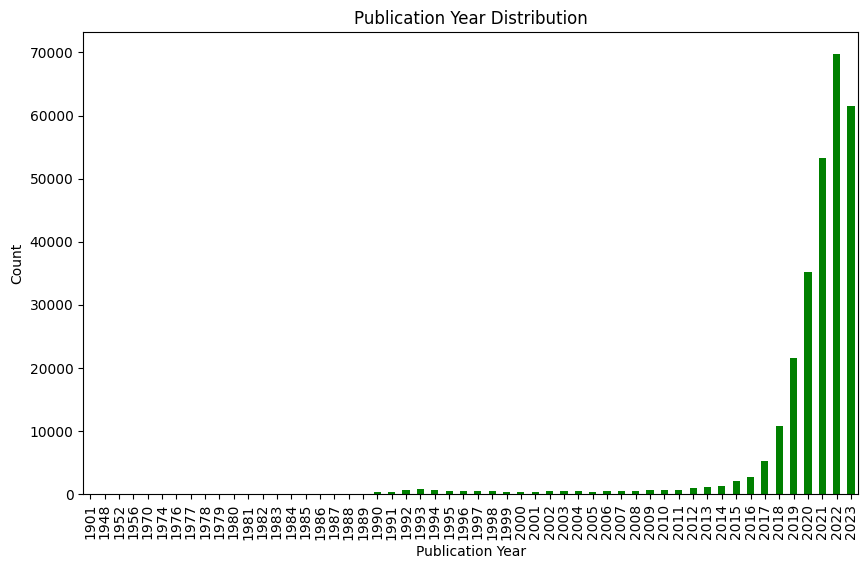

In [22]:
import matplotlib.pyplot as plt

publication_year_counts = all_data['publication_year'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
publication_year_counts.plot(kind='bar', color='green')
plt.title('Publication Year Distribution')
plt.xlabel('Publication Year')
plt.ylabel('Count')
plt.show()

In [23]:
# Counting occurrences of each country code
country_code_counts = all_data['country_code'].value_counts()

# Displaying the counts
print("Country Code Counts:")
print(country_code_counts)

Country Code Counts:
country_code
CN    205688
US     30457
KR     15131
WO     10321
JP      7195
       ...  
SI         1
HR         1
MD         1
CS         1
SU         1
Name: count, Length: 61, dtype: int64


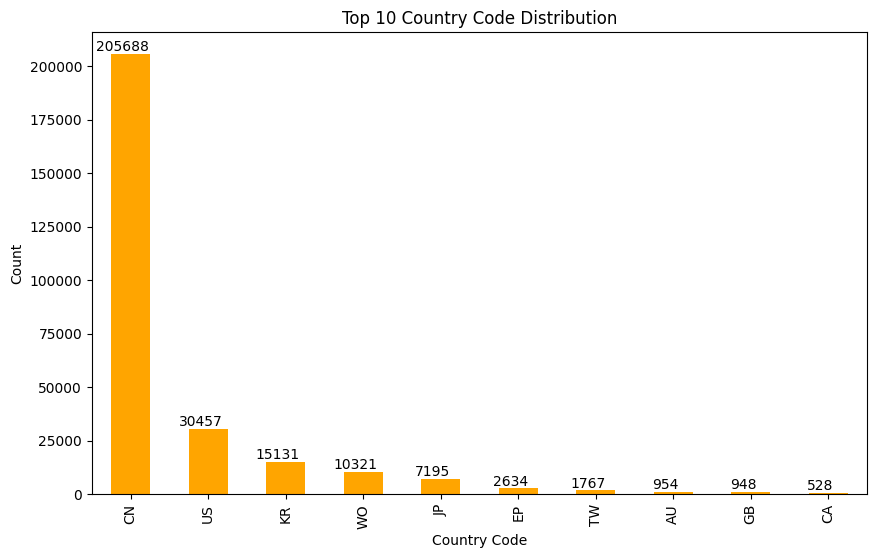

In [24]:
# Counting occurrences of each country code
country_code_counts = all_data['country_code'].value_counts()

# Selecting the top 10 country codes
top_10_country_codes = country_code_counts.head(10)

# Plotting the bar chart for the top 10 country codes
plt.figure(figsize=(10, 6))
bars = top_10_country_codes.plot(kind='bar', color='orange')
plt.title('Top 10 Country Code Distribution')
plt.xlabel('Country Code')
plt.ylabel('Count')

# Adding values on top of the bars
for bar, count in zip(bars.patches, top_10_country_codes.values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05, str(count), ha='center', va='bottom')

plt.show()

## https://register.epo.org/help?lng=en&topic=countrycodes

---
## Last 10 years of data
    As most of AI patents were developed in the last decade, I'm zooming the analysis to check if there's any big difference on the publication countries
   
---

In [25]:
# Filter data for the last 10 years
last_10_years_data = all_data[all_data['publication_date'].dt.year >= (pd.to_datetime('today').year - 10)]

# Counting occurrences of each country code in the last 10 years
country_code_counts_last_10_years = last_10_years_data['country_code'].value_counts()

# Selecting the top 10 country codes
top_10_country_codes_last_10_years = country_code_counts_last_10_years.head(10)

In [26]:
last_10_years_data['publication_date'].min()

Timestamp('2014-01-01 00:00:00')

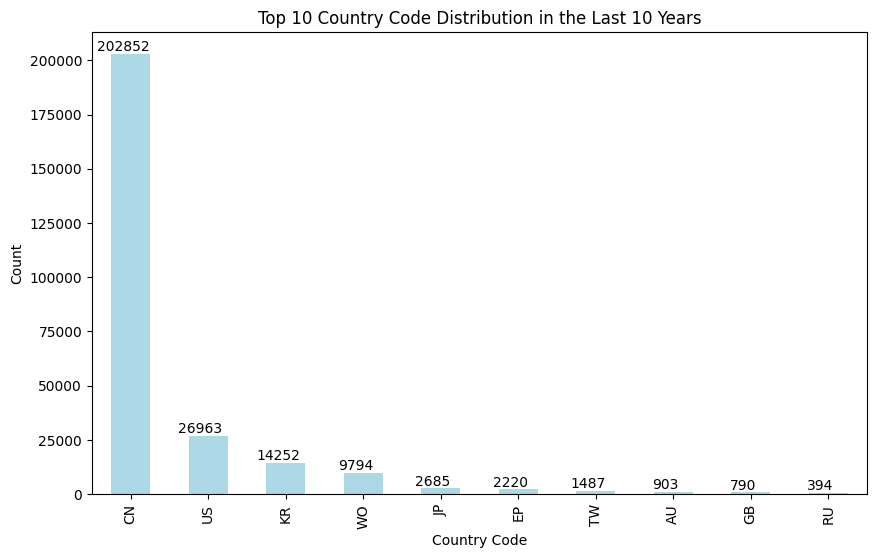

In [27]:
# Plotting the bar chart for the top 10 country codes in the last 10 years with values displayed on top
plt.figure(figsize=(10, 6))
bars = top_10_country_codes_last_10_years.plot(kind='bar', color='lightblue')
plt.title('Top 10 Country Code Distribution in the Last 10 Years')
plt.xlabel('Country Code')
plt.ylabel('Count')

# Adding values on top of the bars
for bar, count in zip(bars.patches, top_10_country_codes_last_10_years.values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05, str(count), ha='center', va='bottom')

plt.show()